In [509]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [510]:
btc_15m = pd.read_csv ('./btc_15m.csv', encoding='unicode_escape')

In [511]:
btc_15m.shape

(9735, 14)

In [512]:
btc_15m = btc_15m[4000:]
len(btc_15m)

5735

In [513]:
btc_15m['time'] = btc_15m['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
btc_15m['time'] = pd.to_datetime(btc_15m["time"])
btc_15m.set_index("time", inplace = True)

In [523]:
def Buy_RSI(btc_15m):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_15m)):
    if (btc_15m ['RSI'][i] < 20 and btc_15m ['K'][i] < 20):
      if flag != 1:
        sigPriceBuy.append(btc_15m['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_15m ["RSI"][i] > 45):
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_15m["close"][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [524]:
Buy_RSI = Buy_RSI(btc_15m)
btc_15m['Long Signal RSI'] = Buy_RSI[0]
btc_15m['Close Long Signal RSI'] = Buy_RSI[1]
# To show the data
btc_15m.head()

,close,Volume,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Long Signal RSI,Close Long Signal RSI
time,,,,,,,,,,,,,,,
2022-09-27 21:45:00,19071.5,2744.241,19077.37677,19300.80383,19483.73426,19611.54091,19612.85254,19448.04461,19153.56305,19742.52617,18859.08148,87.660220,31.950595,NaN,NaN
2022-09-27 22:00:00,19084.0,2199.511,19078.84860,19281.09439,19460.89230,19592.70016,19602.38021,19424.31797,19137.87081,19710.76514,18851.42364,92.883673,32.879617,NaN,NaN
2022-09-27 22:15:00,19012.0,2293.322,19063.99336,19256.63126,19435.24131,19571.96087,19590.68951,19396.83888,19116.42365,19677.25410,18836.00842,92.461342,30.312582,NaN,NaN
2022-09-27 22:30:00,18966.5,1675.084,19042.32817,19230.25569,19408.45609,19550.33727,19578.32932,19365.73419,19094.77720,19636.69119,18823.82020,86.893412,28.783227,NaN,NaN
2022-09-27 22:45:00,19066.5,968.253,19047.69968,19215.36881,19388.91574,19533.05736,19568.19409,19348.34885,19082.38878,19614.30891,18816.42871,87.403318,36.380360,NaN,NaN


In [525]:
btc_15m.describe()

,close,Volume,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Long Signal RSI,Close Long Signal RSI
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5.735000e+03,5735.000000,6.000000,7.000000
mean,18857.087881,1810.697187,18858.617277,18861.881865,18865.530282,18871.506881,18883.577351,18928.924590,18794.839140,19063.010041,18660.753690,5.025893e+01,49.525709,18747.750000,19132.142857
std,1556.648374,3057.582697,1553.719332,1549.156608,1544.725371,1537.266803,1519.840854,1540.934233,1558.935980,1529.256182,1583.045703,3.050543e+01,10.355466,1546.037217,1315.910671
min,15632.500000,78.067000,15711.060560,15736.575380,15757.135210,15787.765520,15869.890500,15792.017280,15679.257550,15902.901090,15174.543140,-2.960000e-14,13.693656,16437.000000,16882.500000
25%,16884.250000,532.404000,16876.742035,16873.405915,16872.112650,16865.256185,17007.378635,16967.274740,16793.506965,17227.285095,16655.027165,2.226877e+01,43.035794,17929.500000,18640.250000
50%,19249.000000,966.592000,19252.867760,19247.951960,19259.880420,19278.687240,19299.540970,19310.905900,19186.460330,19395.488480,19115.739740,5.066546e+01,49.093677,18899.750000,19146.000000
75%,20085.500000,1899.027500,20073.745290,20073.044090,20076.111220,20072.168775,20053.544450,20166.595415,19980.663520,20340.632800,19826.584165,7.797126e+01,55.730178,19582.375000,19784.500000
max,21444.500000,70768.354000,21397.969050,21365.925620,21321.677970,21298.381490,21240.912680,21405.652910,21327.470420,21506.773100,21250.560010,1.000000e+02,93.411165,20834.000000,21047.000000


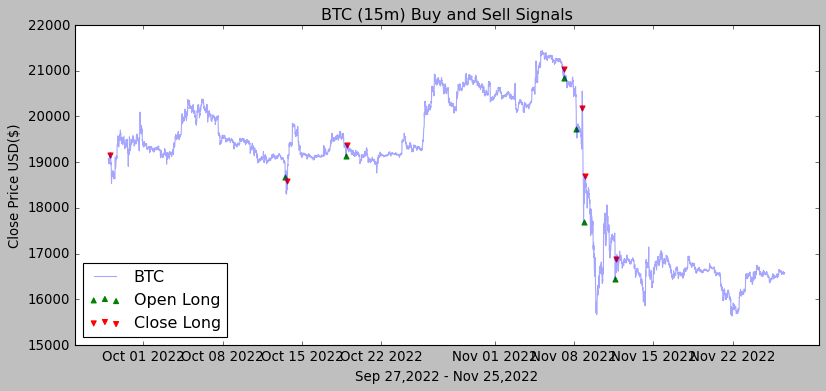

In [526]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_15m['close'], label='BTC', alpha=0.35)
plt.plot(btc_15m['Long Signal RSI'], label='', alpha=0.35)
plt.plot(btc_15m['Close Long Signal RSI'],label='', alpha=0.35)
plt.scatter(btc_15m.index, btc_15m['Long Signal RSI'], label ='Open Long', marker='^',color='green')
plt.scatter(btc_15m.index, btc_15m['Close Long Signal RSI'],label='Close Long', marker='v', color='red')
plt.title('BTC (15m) Buy and Sell Signals')
plt.xlabel("Sep 27,2022 - Nov 25,2022")
plt.ylabel("Close Price USD($)")
plt.legend(loc='lower left')
plt.show()

In [527]:
df = btc_15m.loc[(btc_15m["Long Signal RSI"].notnull()) | (btc_15m["Close Long Signal RSI"].notnull())]
df = df.drop(df.index[0])
df.head()

,close,Volume,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Long Signal RSI,Close Long Signal RSI
time,,,,,,,,,,,,,,,
2022-10-13 12:30:00,18673.5,18152.091,18886.64596,18971.95690,19008.85139,19040.39285,19068.52832,19031.44555,18912.46825,19150.42286,18793.49095,8.992391,14.536361,18673.5,NaN
2022-10-13 17:00:00,18585.0,5613.579,18464.64397,18571.79671,18675.80109,18785.66010,18902.37664,18699.50428,18444.08913,18954.91943,18188.67399,86.006965,47.737378,NaN,18585.0
2022-10-18 21:00:00,19126.0,5341.520,19286.96543,19369.19369,19413.06176,19449.37591,19462.41220,19431.29341,19307.09397,19555.49285,19182.89453,1.038601,19.530731,19126.0,NaN
2022-10-18 22:30:00,19384.0,4009.026,19278.43369,19320.44749,19365.40336,19410.31395,19438.18258,19388.26945,19252.62553,19523.91336,19116.98162,93.935437,54.177154,NaN,19384.0
2022-11-07 02:00:00,20834.0,1046.905,20916.02143,21015.35886,21069.82335,21117.88247,21159.78064,21070.76175,20959.95598,21181.56752,20849.15020,2.770794,19.111590,20834.0,NaN


In [528]:
open_list = list(df["Long Signal RSI"])
close_list = list(df["Close Long Signal RSI"])
open = [x for x in open_list if np.isnan(x) == False]
close = [x for x in close_list if np.isnan(x) == False]

In [529]:
print(open)
print(close)

[18673.5, 19126.0, 20834.0, 19734.5, 17681.5, 16437.0]
[18585.0, 19384.0, 21047.0, 20185.0, 18695.5, 16882.5]


In [530]:
positions = {'Open': open, 'Close': close}
positions = pd.DataFrame(positions)
positions

,Open,Close
0,18673.5,18585.0
1,19126.0,19384.0
2,20834.0,21047.0
3,19734.5,20185.0
4,17681.5,18695.5
5,16437.0,16882.5


In [531]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

In [532]:
positions['Gained or Lost %'] = percentage_change(positions['Open'],positions['Close'])  

In [533]:
positions

,Open,Close,Gained or Lost %
0,18673.5,18585.0,-0.473934
1,19126.0,19384.0,1.348949
2,20834.0,21047.0,1.022367
3,19734.5,20185.0,2.282804
4,17681.5,18695.5,5.734808
5,16437.0,16882.5,2.710349


In [534]:
#positions.loc["Row_Total"] = positions.sum()



In [535]:
positions["Gained or Lost %"].sum()

12.625343106608591

In [441]:
def Sell_RSI(btc_15m):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_15m)):
    if (btc_15m ['RSI'][i] > 77):
      if flag != 1:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_15m['close'][i])
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_15m ["RSI"][i] < 50):
      if flag != 0:
        sigPriceBuy.append(btc_15m["close"][i])
        sigPriceSell.append(np.nan)
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceSell, sigPriceBuy)

In [294]:
Sell_RSI = Sell_RSI(btc_15m)
btc_15m['Short Signal RSI'] = Sell_RSI[0]
btc_15m['Close Short Signal RSI'] = Sell_RSI[1]
# To show the data
btc_15m.head()

,close,Volume,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Long Signal RSI,Close Long Signal RSI,Short Signal RSI,Close Short Signal RSI
time,,,,,,,,,,,,,,,,,
2022-09-27 21:45:00,19071.5,2744.241,19077.37677,19300.80383,19483.73426,19611.54091,19612.85254,19448.04461,19153.56305,19742.52617,18859.08148,87.660220,31.950595,NaN,NaN,NaN,19071.5
2022-09-27 22:00:00,19084.0,2199.511,19078.84860,19281.09439,19460.89230,19592.70016,19602.38021,19424.31797,19137.87081,19710.76514,18851.42364,92.883673,32.879617,NaN,NaN,NaN,NaN
2022-09-27 22:15:00,19012.0,2293.322,19063.99336,19256.63126,19435.24131,19571.96087,19590.68951,19396.83888,19116.42365,19677.25410,18836.00842,92.461342,30.312582,NaN,NaN,NaN,NaN
2022-09-27 22:30:00,18966.5,1675.084,19042.32817,19230.25569,19408.45609,19550.33727,19578.32932,19365.73419,19094.77720,19636.69119,18823.82020,86.893412,28.783227,NaN,NaN,NaN,NaN
2022-09-27 22:45:00,19066.5,968.253,19047.69968,19215.36881,19388.91574,19533.05736,19568.19409,19348.34885,19082.38878,19614.30891,18816.42871,87.403318,36.380360,NaN,NaN,NaN,NaN


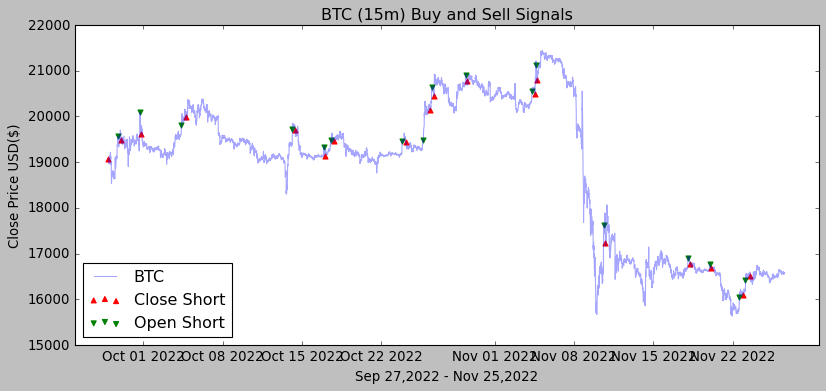

In [295]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_15m['close'], label='BTC', alpha=0.35)
plt.plot(btc_15m['Close Short Signal RSI'], label='', alpha=0.35)
plt.plot(btc_15m['Short Signal RSI'],label='', alpha=0.35)
plt.scatter(btc_15m.index, btc_15m['Close Short Signal RSI'], label ='Close Short', marker='^',color='red')
plt.scatter(btc_15m.index, btc_15m['Short Signal RSI'],label='Open Short', marker='v', color='green')
plt.title('BTC (15m) Buy and Sell Signals')
plt.xlabel("Sep 27,2022 - Nov 25,2022")
plt.ylabel("Close Price USD($)")
plt.legend(loc='lower left')
plt.show()

In [296]:
df_2 = btc_15m.loc[(btc_15m["Short Signal RSI"].notnull()) | (btc_15m["Close Short Signal RSI"].notnull())]
df_2 = df_2.drop(df_2.index[0])
df_2.head()

,close,Volume,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Long Signal RSI,Close Long Signal RSI,Short Signal RSI,Close Short Signal RSI
time,,,,,,,,,,,,,,,,,
2022-09-28 18:00:00,19575.0,10490.301,19399.04998,19216.30794,19118.17647,19069.43377,19111.56579,19341.81128,19090.80460,19592.81797,18839.79791,92.673032,77.823540,NaN,NaN,19575.0,NaN
2022-09-29 00:45:00,19474.0,3812.792,19552.76438,19527.13330,19459.34260,19365.00014,19289.52583,19638.36618,19415.90041,19860.83194,19193.43465,0.000000,48.473832,NaN,NaN,NaN,19474.0
2022-09-30 17:00:00,20093.5,11229.970,19725.77092,19570.47099,19531.37794,19500.92711,19462.50287,19702.63867,19438.30332,19966.97402,19173.96797,100.000000,78.758229,NaN,NaN,20093.5,NaN
2022-09-30 19:30:00,19616.0,3777.438,19723.59542,19679.55045,19630.83063,19579.76112,19516.95600,19835.35385,19523.74705,20146.96065,19212.14025,7.253607,48.167363,NaN,NaN,NaN,19616.0
2022-10-04 08:30:00,19817.5,10245.767,19664.77472,19610.65340,19583.31230,19539.72059,19461.33355,19665.34745,19555.95935,19774.73555,19446.57125,100.000000,78.775092,NaN,NaN,19817.5,NaN


In [297]:
short_open_list = list(df_2["Short Signal RSI"])
short_close_list = list(df_2["Close Short Signal RSI"])
open = [x for x in short_open_list if np.isnan(x) == False]
close = [x for x in short_close_list if np.isnan(x) == False]

In [298]:
print(open)
print(close)

[19575.0, 20093.5, 19817.5, 19729.0, 19327.5, 19482.5, 19462.5, 19489.0, 20652.5, 20909.0, 20557.0, 21125.0, 17629.5, 16895.0, 16780.0, 16050.0, 16428.0]
[19474.0, 19616.0, 19982.0, 19692.5, 19138.5, 19453.0, 19435.0, 20137.5, 20448.5, 20764.5, 20485.5, 20790.5, 17239.5, 16780.5, 16675.0, 16103.5, 16507.5]


In [299]:
positions = {'Open': open, 'Close': close}
positions = pd.DataFrame(positions)
positions

,Open,Close
0,19575.0,19474.0
1,20093.5,19616.0
2,19817.5,19982.0
3,19729.0,19692.5
4,19327.5,19138.5
5,19482.5,19453.0
6,19462.5,19435.0
7,19489.0,20137.5
8,20652.5,20448.5
9,20909.0,20764.5


In [300]:
positions['Gained or Lost %'] = percentage_change(positions['Close'],positions['Open'])  

In [301]:
positions

,Open,Close,Gained or Lost %
0,19575.0,19474.0,0.518640
1,20093.5,19616.0,2.434237
2,19817.5,19982.0,-0.823241
3,19729.0,19692.5,0.185350
4,19327.5,19138.5,0.987538
5,19482.5,19453.0,0.151648
6,19462.5,19435.0,0.141497
7,19489.0,20137.5,-3.220360
8,20652.5,20448.5,0.997628
9,20909.0,20764.5,0.695899


In [302]:
positions.loc["Row_Total"] = positions.sum()


In [303]:
positions

,Open,Close,Gained or Lost %
0,19575.0,19474.0,0.518640
1,20093.5,19616.0,2.434237
2,19817.5,19982.0,-0.823241
3,19729.0,19692.5,0.185350
4,19327.5,19138.5,0.987538
5,19482.5,19453.0,0.151648
6,19462.5,19435.0,0.141497
7,19489.0,20137.5,-3.220360
8,20652.5,20448.5,0.997628
9,20909.0,20764.5,0.695899
